# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anoukchapuis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1910'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB230_1913-07-05_01-0001.txt',
 'KB_JB449_1912-01-04_01-00003.txt',
 'KB_JB685_1913-06-07_01-0006.txt',
 'KB_JB773_1918-11-30_01-00002.txt',
 'KB_JB835_1911-04-24_01-00004.txt']

In [7]:
texts = [open(data_path + f).read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

'5 centime* le numéro pour toute la Belgique.\n\nSamedi 5 juillet 1913.\n(tâ tu)\n\n«uta\n\nABONNEMENTS\n\n« «m oÉMoomo—e •*«• réëoctmo euwi LE ÇATRIOTE\n\nMLOIQUB i U* km, iO fr : • Mie, » f» i\n»üeu, Nfr.il mote, fr. itt 00 |\n■oleele N Qre**4 ■ Duché é$ Lus»mlrarf f \n. o oam lt M.M j t u Ir. to.4*.\n* mm* \n\nI mole, fr 9 -6\n3 mole, • freoce.\n\nêtre mm. le U*—rt éee («rttu pututu \n\nTrentième année. — N. 186.\n\nPA'

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [12]:
# Détail de la matrice
tfidf_vectors

<706x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 577230 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

+             0.432937
socialiste    0.271808
budget        0.175455
projet        0.140484
aa            0.138731
                ...   
doub          0.000000
double        0.000000
douce         0.000000
douleur       0.000000
♦             0.000000
Length: 4000, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0.0171038, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

0.6732949657587133

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{0: ['KB_JB838_1910-01-06_01-00008.txt',
     'KB_JB838_1910-01-09_01-00010.txt',
     'KB_JB838_1910-02-01_01-00007.txt',
     'KB_JB838_1910-02-10_01-00011.txt',
     'KB_JB838_1910-03-08_01-00006.txt',
     'KB_JB838_1910-03-17_02-00008.txt',
     'KB_JB838_1910-04-18_01-00004.txt',
     'KB_JB838_1910-04-30_01-00007.txt',
     'KB_JB838_1910-05-02_01-00008.txt',
     'KB_JB838_1910-07-04_01-00006.txt',
     'KB_JB838_1910-07-12_01-00006.txt',
     'KB_JB838_1910-07-14_01-00007.txt',
     'KB_JB838_1910-07-15_01-00007.txt',
     'KB_JB838_1910-09-02_01-00008.txt',
     'KB_JB838_1910-09-24_01-00008.txt',
     'KB_JB838_1910-10-14_01-00008.txt',
     'KB_JB838_1910-10-29_01-00007.txt',
     'KB_JB838_1910-11-01_01-00006.txt',
     'KB_JB838_1910-11-06_01-00008.txt',
     'KB_JB838_1910-11-18_01-00007.txt',
     'KB_JB838_1910-11-24_01-00007.txt',
     'KB_JB838_1910-12-04_01-00013.txt',
     'KB_JB838_1910-12-06_01-00007.txt',
     'KB_JB838_1910-12-10_01-00007.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
reduced_vectors[:10]

array([[-0.25892052, -0.0725917 ],
       [-0.18820384,  0.04276631],
       [-0.01854066,  0.02631361],
       [-0.08616289,  0.02026105],
       [-0.1738209 ,  0.02619691],
       [ 0.10695606,  0.53242232],
       [-0.33443502, -0.12899521],
       [ 0.22391749,  0.33933112],
       [ 0.60173611, -0.30042828],
       [ 0.42183086,  0.00802234]])

### Générer le plot

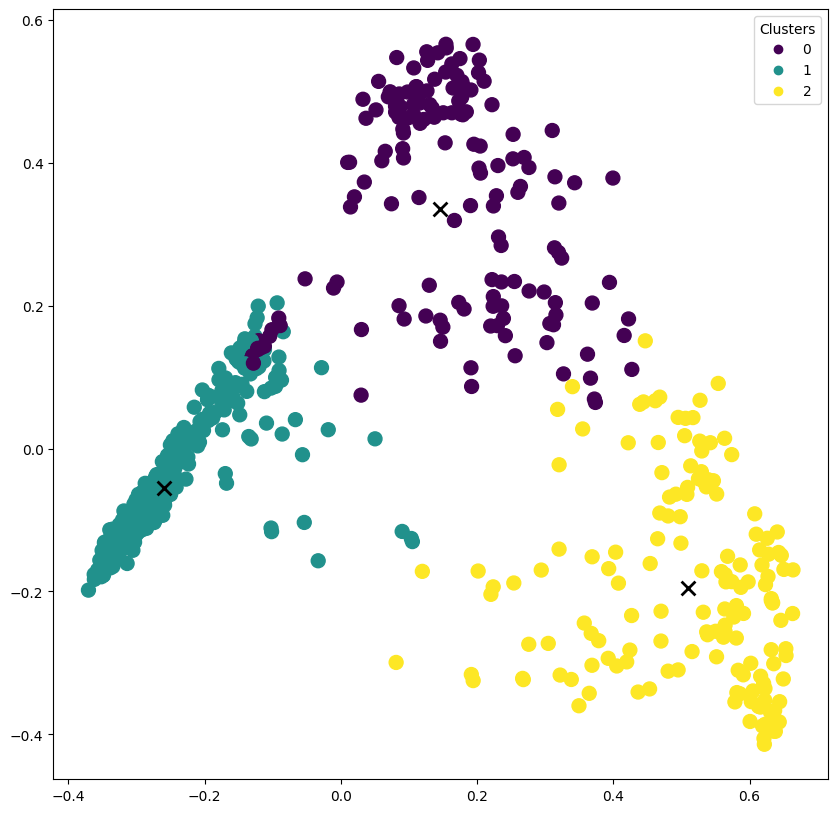

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")